# Aula 6 - Selecionando e Ajustando Modelos

Em muitos métodos de classificação e regressão, precisamos definir os valores do hiperparâmetros dos modelos, que são parâmetros ajustados pelo usuário. Exemplos desses métodos são o algoritmo k-vizinhos, onde precisamos definir o valor $k$, e o número de árvores no algoritmo florestas aleatórias.

Se dividirmos o conjunto de dados em apenas duas partes, uma teste e outra para treinamento, método chamado holdout, depedendo da execução do classificador, podemos obter diferentes resultos. A seguir, mostramos o desempenho do classificar knn de acordo com a execução. Notem que os valores se distribuem de acordo com uma distribuição de probabilidades que se aproxima e uma distribuição Gaussiana.



Acuracia media: 0.8226881720430108


/tmp/ipykernel_14743/460263766.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vacc, hist = True, kde = True,kde_kws = {'linewidth': 3})


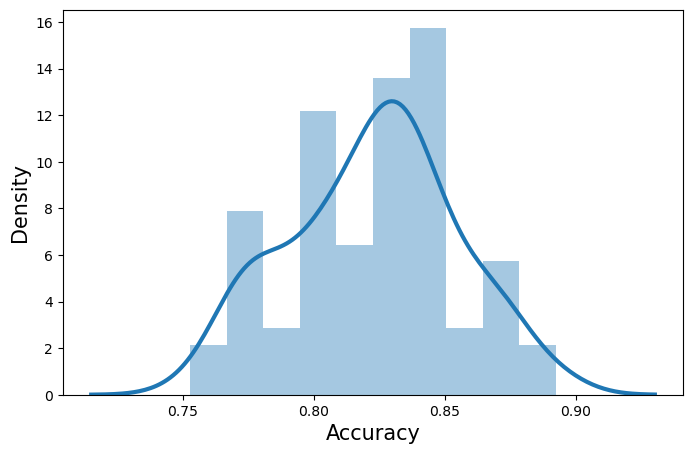

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns

data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/Iris.csv', header=(0))

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

p = 0.7 # fracao de elementos no conjunto de treinamento
Ns = 100 # numero de execucoes da classificacao
vacc = []
for n in range(0, Ns):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p)

    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    vacc.append(score)
print('Acuracia media:', np.mean(vacc))
plt.figure(figsize=(8,5))
sns.distplot(vacc, hist = True, kde = True,kde_kws = {'linewidth': 3})
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlabel('Accuracy', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show(True)

Portanto, podemos ter uma alta ou baixa acurácia, dependendo da execução.

Além disso, a escolha dos parâmetros do modelo também é influenciada pela execução. Vamos considerar um exemplo. No classificador k-vizinhos, o hiperparâmetro 
k
 influencia na classificação e a escolha do melhor valor de 
k
 pode depender da execução se usar o método hold-out, conforme vemos a seguir.

/tmp/ipykernel_14743/2172292595.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vk, hist = True, kde = True,kde_kws = {'linewidth': 3})


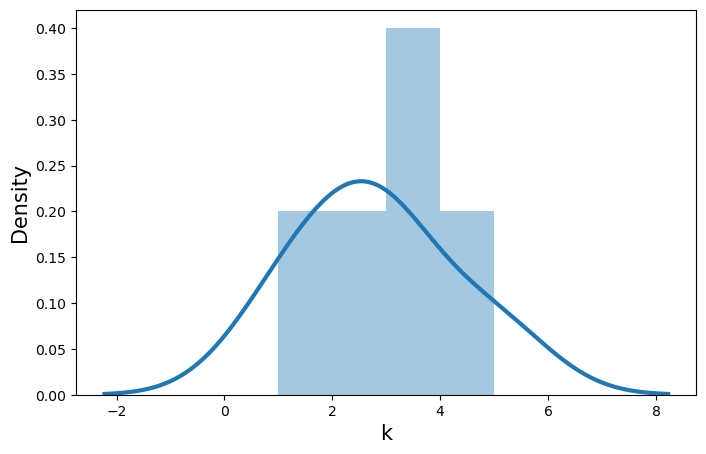

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/Iris.csv', header=(0))

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

p = 0.7 # fracao de elementos no conjunto de treinamento
Ns = 5 # numero de execucoes da classificacao
vk = []
for n in range(0, Ns):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p)
    
    vbest = []
    for k in range(1, 10):
        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_pred, y_test)
        vbest.append(score)
    vk.append(np.argmax(vbest)+1)    

plt.figure(figsize=(8,5))
sns.distplot(vk, hist = True, kde = True,kde_kws = {'linewidth': 3})
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlabel('k', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show(True)

Portanto, dependendo da execução, podemos encontrar um valor diferente para 
k
, de modo a obter a melhor acurácia. Logo, não podemos obter o melhor modelo de uma maneira adequada.

Para evitarmos essa dependência da execução e diminuirmos a variância, podemos usar os métodos de validação cruzada.



In [7]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10)
vacc = []
for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = GaussianNB()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    vacc.append(score)
print('Acuracia media:', np.mean(vacc))

Acuracia media: 0.7645161290322581


Notem que mesmo que executemos o código várias vezes, obtemos sempre aproximadamente a mesma acurácia.

In [8]:
from sklearn.model_selection import KFold

for i in range(0,5):
    cv = KFold(n_splits=10)
    vacc = []
    for train_index, test_index in cv.split(X, y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = GaussianNB()
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)
        vacc.append(score)
    print('Acuracia media:', np.mean(vacc))


Acuracia media: 0.7645161290322581
Acuracia media: 0.7645161290322581
Acuracia media: 0.7645161290322581
Acuracia media: 0.7645161290322581
Acuracia media: 0.7645161290322581


Caso os dados sejam desbalanceado, podemos usar ainda a validação cruzada estratificada.



In [9]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

vacc = []
for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = GaussianNB()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    vacc.append(score)
print('Acuracia media:', np.mean(vacc))


Acuracia media: 0.8258064516129032


Para escolhermos os melhores hiperparâmetros do modelo usando validação cruzada, podemos usar o método GridSearch da biblioteca sckit-learn.



In [10]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
model = KNeighborsClassifier(metric = 'euclidean')
best_model = GridSearchCV(model, parameters, cv = 10)
best_model.fit(X,y)
y_pred = best_model.predict(X) 
print('Best parameters:', best_model.best_params_)
print('Accuracy:', accuracy_score(y_pred, y))

Best parameters: {'n_neighbors': 10}
Accuracy: 0.8838709677419355


Essa mesma execução pode ser executada com o código abaixo. Portanto, o método GridSearch automatiza o processo.



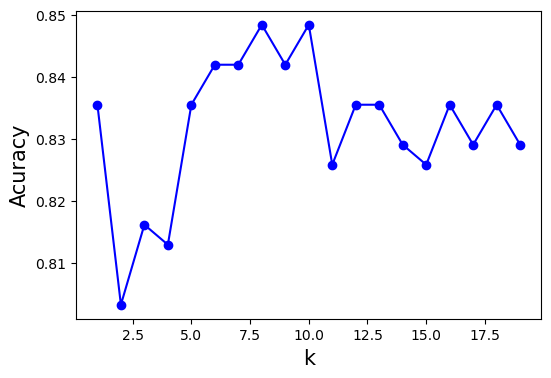

Melhor k: 10
Accuracy: 0.8838709677419355


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/Iris.csv', header=(0))

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

nkf = 10 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, X, y, cv=nkf)
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.figure(figsize=(6,4))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Acuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
best_model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
best_model.fit(X,y)
y_pred = best_model.predict(X) 
print('Accuracy:', accuracy_score(y_pred, y))

Notem que nos exemplos anteriores, ainda não dividimos os dados em teste e treinamento. Usamos todo o cojunto de dados como treinamento. No entanto, na prática, devemos inicialmente separar os dados em dois conjuntos. Mas notem que a escolha do conjunto de teste está relacionado com o mesmo problema anterior, dependendo da execução, conforme vemos a seguir.



Acuracia media: 0.8258064516129032


/tmp/ipykernel_14743/1627091002.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vacc, hist = True, kde = True,kde_kws = {'linewidth': 3})


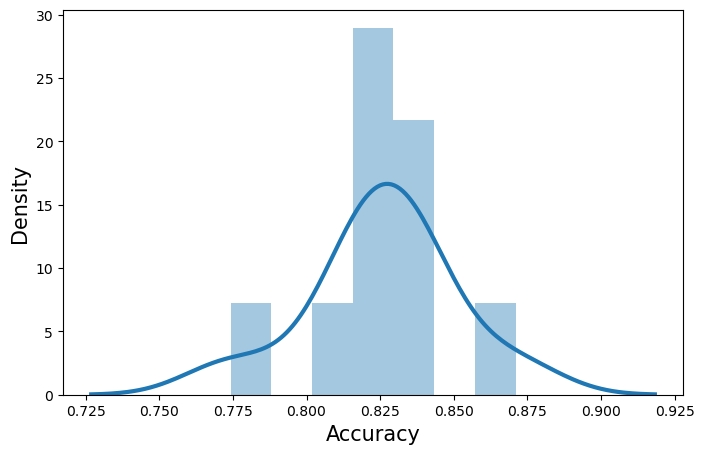

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#data = pd.read_csv('data/Iris.csv', header=(0))
data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/vertebralcolumn-3C.csv', header=(0))

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Ns = 10 #number of executions
vacc = []
for n in range(0,Ns):
    p = 0.8 # fracao de elementos no conjunto de treinamento
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p)

    parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
    model = KNeighborsClassifier(metric = 'euclidean')
    best_model = GridSearchCV(model, parameters, cv = 10)
    best_model.fit(X_train,y_train)
    y_pred = best_model.predict(X_test) 
    #print('Best parameters:', grid.best_params_)
    #print('Accuracy:', accuracy_score(y_pred, y_test))
    vacc.append(accuracy_score(y_pred, y_test))

print('Acuracia media:', np.mean(vacc))
plt.figure(figsize=(8,5))
sns.distplot(vacc, hist = True, kde = True,kde_kws = {'linewidth': 3})
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlabel('Accuracy', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show(True)

Para resolver essa limitação com relação à seleção conjunto de teste, podemos considerar o método de validação cruzada aninhada (nested cross validation). A seguir, implementamos uma função para utilizar esse método.

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def classification_nested_crossvalidation(X, y, n_folds,k_folds, model, hp_grid):
    # define the external cross validation
    cv_outer = KFold(n_folds, shuffle=True)
    vacc = list()
    # CV external lood
    for train_out, test_out in cv_outer.split(X):
        train_x, train_y = X[train_out], y[train_out]
        test_x, test_y = X[test_out], y[test_out]
        # internal CV (training and validation sets)
        grid_search_cv = GridSearchCV(model, hp_grid, cv=k_folds, refit=True)
        # find the best hyperparameters
        result = grid_search_cv.fit(train_x, train_y)
        best_model = result.best_estimator_
        # prediction in the test fold
        pred_y = best_model.predict(test_x) 
        vacc.append(accuracy_score(test_y, pred_y))
    return np.mean(vacc), np.std(vacc)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/Iris.csv', header=(0))

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

n_folds = 5 # cv external folds
k_folds = 10 # cv internal folds (training set)
parameters = {'n_neighbors':range(1,10)}
model = KNeighborsClassifier()
av_acc,std_acc = classification_nested_crossvalidation(X, y, n_folds, 
                                                       k_folds, model,parameters)
print('Accuracy:', av_acc, 'std:', std_acc)

Accuracy: 0.8354838709677418 std: 0.03870967741935486


Assim, podemos fazer a seleção do modelo de forma que os resultados não dependam da execução. Em resumo, o método de validação cruzada aninhada permite reduzir a variância e selecionar os melhores hiperparâmetros dos modelos.



# Seleção do modelo usando grid_search
Ver: https://scikit-learn.org/stable/modules/grid_search.html

É possível escolhermos os hiperparâmetros de um modelo usando o método grid_search da biblioteca sklearn. Vamos inicialmente ler os dados e separar os conjuntos de treinamento e teste.



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns

#data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/iris.csv', header=(0))

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

Para realizar o grid_search, precisamos definir quais hiperparâmetros serão considerados e os valores que serão testados.

In [19]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

Podemos então chamar o método. Notem que já fazemos a validação cruzada.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)


Aplicamos aos conjuntos de dados e treinamento.

In [22]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


A acurácia do método:

In [23]:
print("Acurácia: ", g_res.best_score_)

Acurácia:  0.9888888888888889


Os melhores hiperparâmetros identificados para obter essa melhor acurácia:

In [24]:
print("Melhores hiperparâmetros: ", g_res.best_params_)

Melhores hiperparâmetros:  {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}


Finalmente, voltamos a ajustar o modelo, mas agora com os melhores hiperparâmetros:

In [25]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

Fazemos a predição e calculamos a acurácia com esses melhores hiperparâmetros:

In [26]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9777777777777777
Test set accuracy:  0.9666666666666667
